In [1]:
import cv2
import matplotlib.pyplot as plt

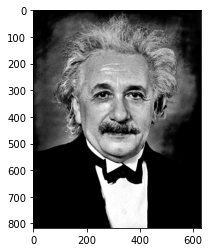

In [2]:
einstein = cv2.imread(filename="images/einstein.jpg", flags=0)
plt.figure(), plt.imshow(X=einstein, cmap="gray");

In [3]:
# sınıflandırıcı
face_cascade = cv2.CascadeClassifier(filename="haarcascade_frontalface_default.xml")

In [4]:
face_rect = face_cascade.detectMultiScale(image=einstein)

In [5]:
for (x, y, width, height) in face_rect:
    cv2.rectangle(img=einstein,
                  pt1=(x, y),
                  pt2=(x+width, y+height),
                  color=(255, 255, 255),
                  thickness=10)

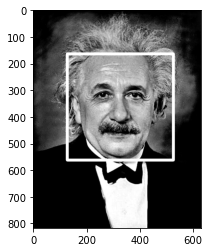

In [6]:
plt.figure(), plt.imshow(X=einstein, cmap="gray");

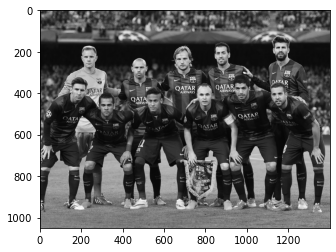

In [7]:
barce = cv2.imread(filename="images/barcelona.jpg", flags=0)
plt.figure(), plt.imshow(X=barce, cmap="gray");

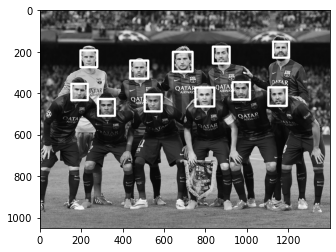

In [8]:
face_rect = face_cascade.detectMultiScale(image=barce, minNeighbors=7)

for (x, y, width, height) in face_rect:
    cv2.rectangle(img=barce, 
                  pt1=(x, y),
                  pt2=(x+width, y+height),
                  color=(255, 255, 255),
                  thickness=10)
plt.figure(), plt.imshow(X=barce, cmap="gray");

In [11]:
video = cv2.VideoCapture(0)

while True:
    retval, img = video.read()
    if not retval: break
    img = cv2.flip(src=img, flipCode=1)
    
    face_rect = face_cascade.detectMultiScale(image=img, minNeighbors=7)
    
    for (x, y, width, height) in face_rect:
        cv2.rectangle(img=img, 
                      pt1=(x, y),
                      pt2=(x+width, y+height),
                      color=255,
                      thickness=10)
    
    cv2.imshow(winname="Video", mat=img)
    if cv2.waitKey(1) == ord("q"): break
    
video.release()
cv2.destroyAllWindows()

## cv2.CascadeClassifier(filename, scaleFactor, minNeighbors, flags, minSize, maxSize)
### Bu fonksiyon, OpenCV kütüphanesinin bir parçası olarak yüz, göz, gülümseme vb. gibi nesneleri algılamak için kullanılan bir sınıflandırıcıyı yaratmak için kullanılır. Bu fonksiyon, verilen bir XML dosyasını yükler ve bu dosyadaki özellik tabanlı bir sınıflandırıcıyı oluşturur.
### filename: Algılayıcıyı tanımlayan XML dosyasının yolu.
### scaleFactor: Görüntünün ölçeklendirilme faktörüdür. Nesnelerin algılanması için görüntü üzerindeki her ölçeği denemek için kullanılır. Örneğin, 1.1 değeri, her seviyede görüntünün %10 daha küçültülmesini sağlar.
### minNeighbors: Her bir aday dikdörtgen bölge için minimum komşu sayısıdır. Bu değer, belirli bir nesnenin doğru algılanmasını sağlamak için kullanılır. Daha büyük değerler, daha az ancak daha güvenilir algılamalara yol açar.
### flags: Eski OpenCV sürümleriyle uyumluluk için kullanılan bir bayraktır. Genellikle 0 olarak ayarlanır.
### minSize: Minimum algılama boyutunu belirtir. Örneğin, (30, 30) değeri ile yüz algılama yapılıyorsa, algılanacak yüzler en az 30x30 piksel boyutunda olmalıdır.
### maxSize: Maksimum algılama boyutunu belirtir. Bu parametre kullanılmazsa, boyut sınırlaması yapılmaz.